# Análise de cotação de empresas potenciais em valorização IBOV
Autora: Daniela Guerra Lima Bertolo


## Objetivos: 
Analizar a evolução de empresas com bom pontecial de valorização nos setores de varejo, energia, e algumas small caps.



## Análise Inicial
Começar analizando magazine luiza , americanas, submarino, tim, wege, rumo, verificar empresas de energia eólica e solar, 
technos, vivara, via varejo, pao de açucar, logistica.

In [7]:
# aqui importei as ferramentas necessárias
from pandas_datareader import data, wb
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [25]:
# leitura do dataset e uso do datetime usado na tarefa do curso mencionado, 
# como dados muito antigos não me interessavam filtrei à partir de 2010

start = datetime.datetime(2010,1,1)
end =  datetime.datetime(2019,1,1)
data_source='yahoo'

st = pd.read_csv('ibovespa-stocks.zip')
#st = data.DataReader('MGLU3.SA','yahoo', start, end)
st.head()

,datetime,ticker,open,close,high,low,volume
0,1998-03-05,BRDT3,28.01,32.50,32.50,28.01,1336.43
1,1998-03-09,BRDT3,35.00,35.00,35.00,35.00,1574.99
2,1998-03-16,BBDC3,10.50,10.50,10.50,10.50,613200.00
3,1998-03-16,BBDC4,10.90,10.95,10.95,10.65,8684946.40
4,1998-03-16,BBAS3,8.10,8.00,8.10,7.90,120403.00


In [26]:
st.info() # dataset extraído do kaggle

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193001 entries, 0 to 193000
Data columns (total 7 columns):
datetime    193001 non-null object
ticker      193001 non-null object
open        193001 non-null float64
close       193001 non-null float64
high        193001 non-null float64
low         193001 non-null float64
volume      193001 non-null float64
dtypes: float64(5), object(2)
memory usage: 10.3+ MB


In [27]:
st.max()

datetime     2018-12-28
ticker            WEGE3
open             798.98
close            819.99
high                820
low                 795
volume      4.96465e+09
dtype: object

In [28]:
st[['datetime','ticker','close']]

,datetime,ticker,close
0,1998-03-05,BRDT3,32.50
1,1998-03-09,BRDT3,35.00
2,1998-03-16,BBDC3,10.50
3,1998-03-16,BBDC4,10.95
4,1998-03-16,BBAS3,8.00
5,1998-03-16,CMIG4,52.20
6,1998-03-16,ELET3,52.00
7,1998-03-16,ELET6,56.50
8,1998-03-16,GOAU4,41.89
9,1998-03-16,ITSA4,0.96


In [99]:
mglu = st[st['ticker']=='MGLU3']
print(mglu)

          datetime ticker    open   close    high     low       volume
85883   2011-05-02  MGLU3   16.10   16.45   16.60   16.10  143468804.0
85928   2011-05-03  MGLU3   16.50   16.30   16.69   16.20   17392996.0
85973   2011-05-04  MGLU3   16.32   16.48   16.48   16.32   20178219.0
86018   2011-05-05  MGLU3   16.41   16.38   16.41   16.32   18256498.0
86063   2011-05-06  MGLU3   16.35   16.26   16.38   16.00   19709202.0
86108   2011-05-09  MGLU3   16.25   16.00   16.30   16.00    7204611.0
86153   2011-05-10  MGLU3   15.98   16.59   16.59   15.90   11213712.0
86198   2011-05-11  MGLU3   16.25   16.40   16.50   16.25    3262158.0
86243   2011-05-12  MGLU3   16.22   16.42   16.42   16.20    3756330.0
86288   2011-05-13  MGLU3   16.40   16.35   16.40   16.24    3632560.0
86333   2011-05-16  MGLU3   16.26   16.15   16.27   16.00    8661870.0
86378   2011-05-17  MGLU3   16.10   16.10   16.15   16.02    2797873.0
86423   2011-05-18  MGLU3   16.05   15.80   16.13   15.77   11101790.0
86468 

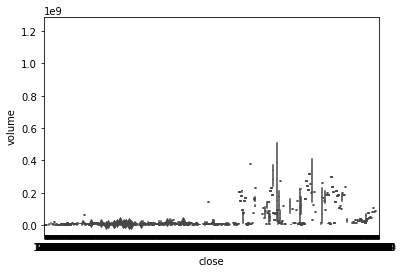

In [100]:
sns.boxplot(x ='close', y = 'volume', data=mglu,palette ='rainbow', orient = 'v')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


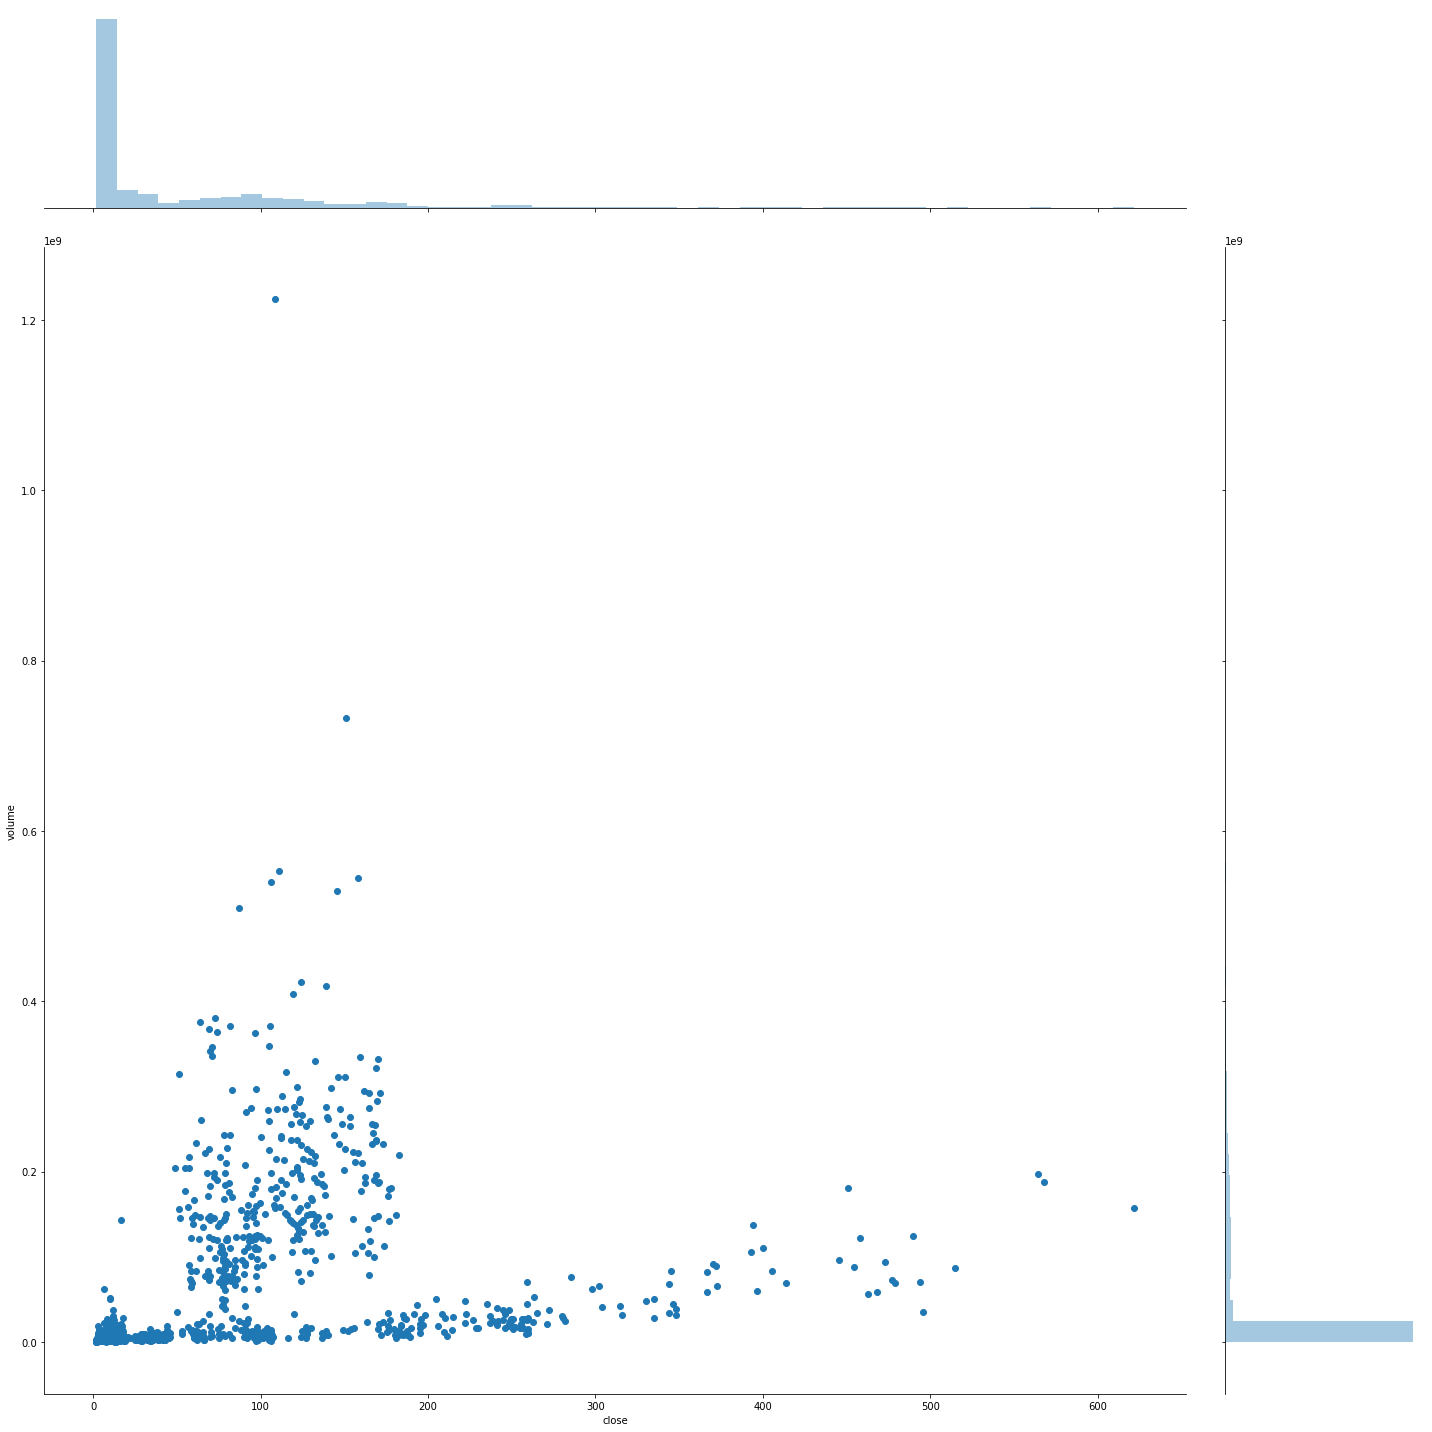

In [101]:
sns.jointplot(x ='close', y='volume',data=mglu,size=20)

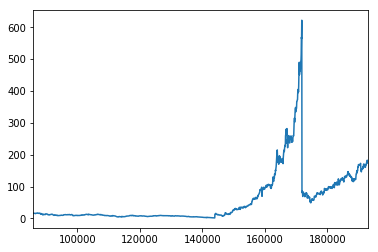

In [88]:
mglu['close'].plot()

In [14]:
mglu = data.DataReader('MGLU3.SA','yahoo', start, end)
lame = data.DataReader('LAME4.SA','yahoo', start, end)
btow = data.DataReader('BTOW3.SA','yahoo', start, end)
mglu.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-05-02,2.07500,2.0125,2.01250,2.05625,70000800.0,0.790502
2011-05-03,2.08625,2.0250,2.06250,2.03750,8417600.0,0.783294
2011-05-04,2.06000,2.0400,2.04000,2.06000,9800800.0,0.791944
2011-05-05,2.05125,2.0400,2.05125,2.04750,8774400.0,0.787139
2011-05-06,2.04750,2.0000,2.04375,2.03250,9668000.0,0.781372


In [15]:
varejo_ibov = ['MGLU3', 'BTOW3', 'LAME']